In [1]:
# Графики и вычисления к лекции 1

from math import *
import numpy as np
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

plt.rcParams.update({
    "font.size": 11,
    "axes.titlesize": 8,
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7,
    "figure.titlesize": 8,
    "figure.dpi": 600,
    "lines.linewidth": 1,
    "axes.linewidth": 0.6,
    "grid.linewidth": 0.3,
    "xtick.major.width": 0.6,
    "ytick.major.width": 0.6,
    "xtick.minor.width": 0.3,
    "ytick.minor.width": 0.3,
})

In [2]:
# Данные по индексу SnP 500

# Загрузка данных
if True:   # Заменить на False, чтобы загрузить заново
    spx = pd.read_csv('data/spx-2015-2024.csv', index_col='Date', parse_dates=True)
else:
    spx = yf.Ticker('^GSPC').history(start='2015-01-01', end='2024-12-31', period='1d')
    spx.to_csv('data/spx-2015-2024.csv', date_format='%Y-%m-%d', float_format='%.2f')

# Логарифмические доходности
S = spx.Close.to_numpy()
L = np.diff(np.log(S))
sigma = L.std()
mu = L.mean() - 0.5*sigma**2

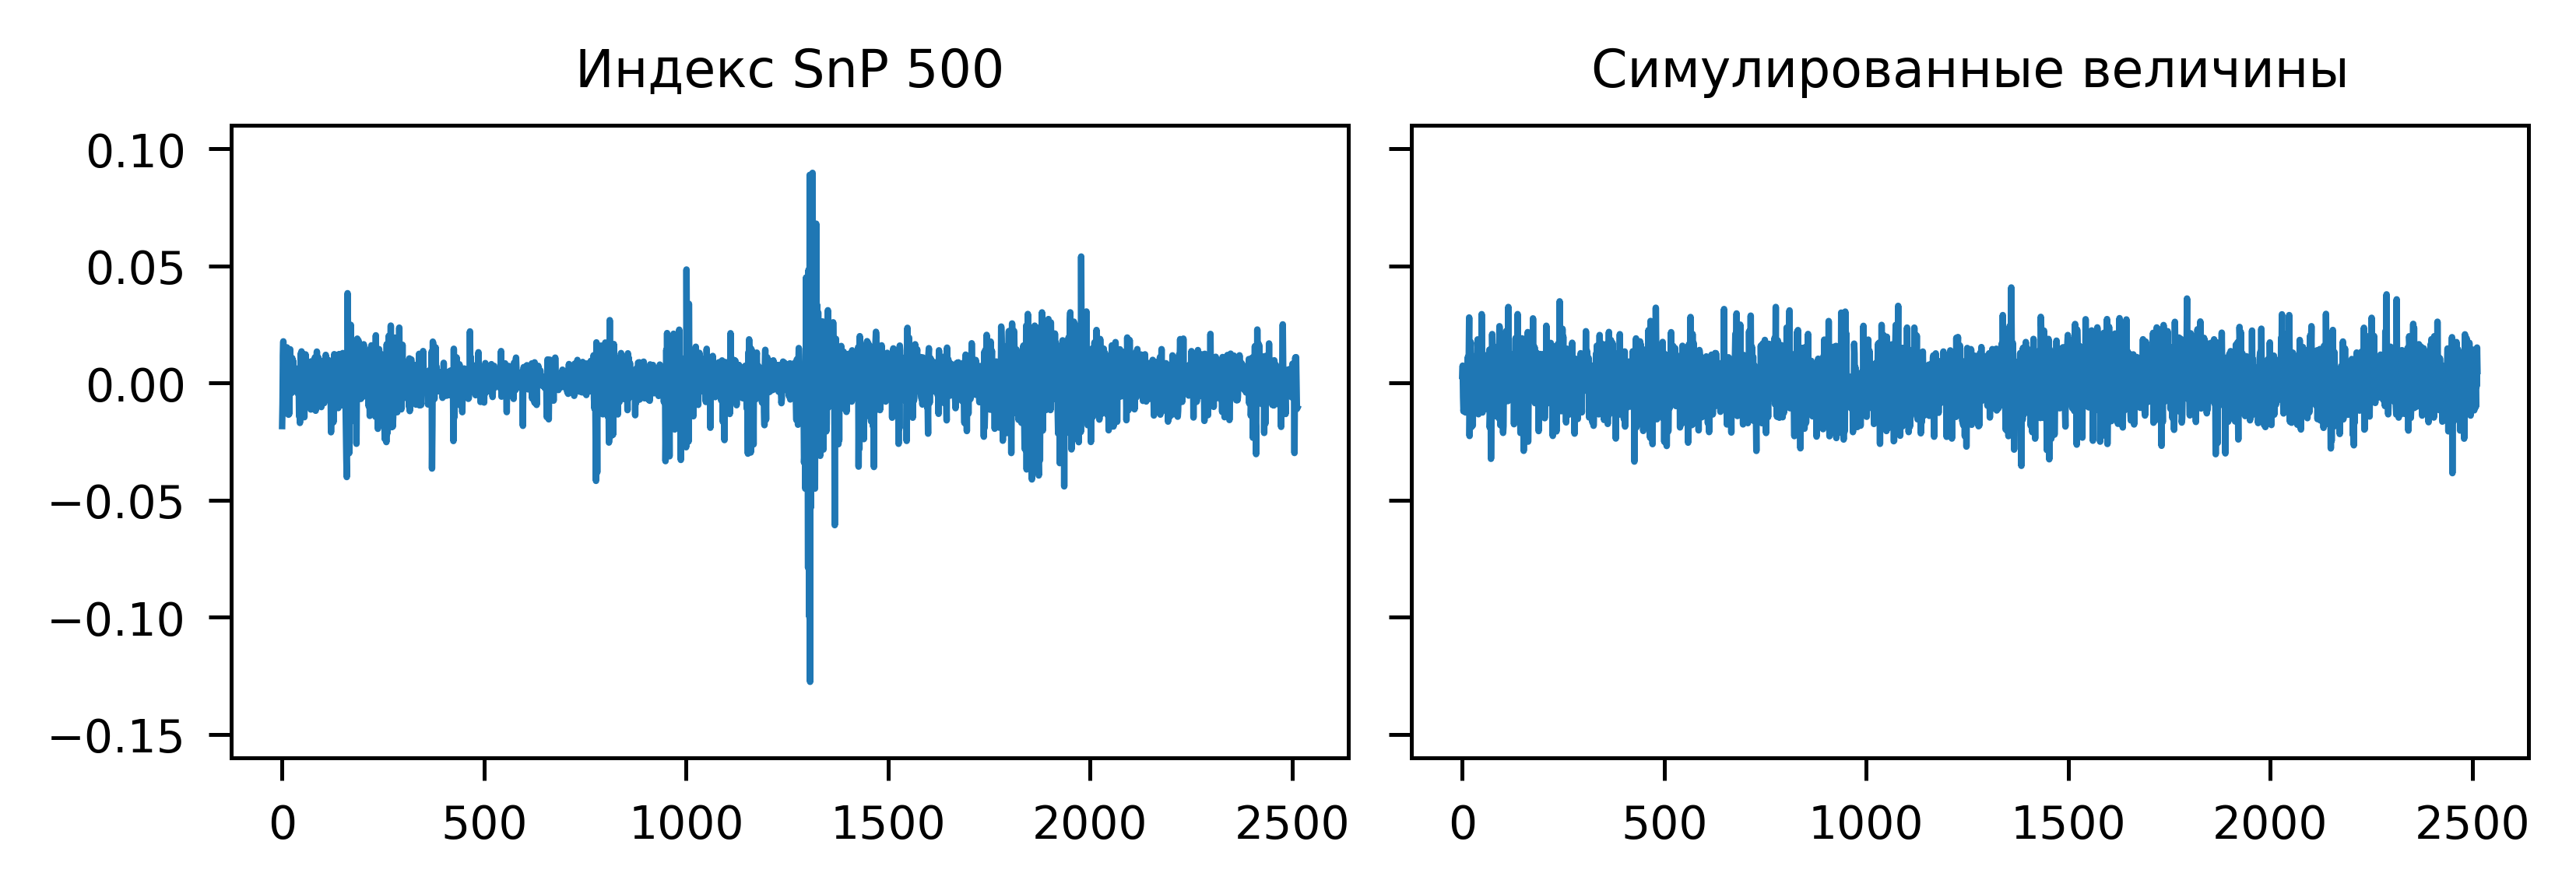

In [3]:
# Сравнение дневных доходностей с нормальным распределением

fig, ax = plt.subplots(1, 2, figsize=(5.4, 1.8), constrained_layout=True, sharey=True)

# Индекс
ax[0].set_title('Индекс SnP 500')
ax[0].set_ylim(-0.16,0.11)
ax[0].set_yticks(np.arange(-0.15, 0.15, 0.05))
ax[0].plot(L)

# Симулированные величины
ax[1].set_title('Симулированные величины')
X = np.random.randn(len(L))*sigma + mu
ax[1].plot(X);

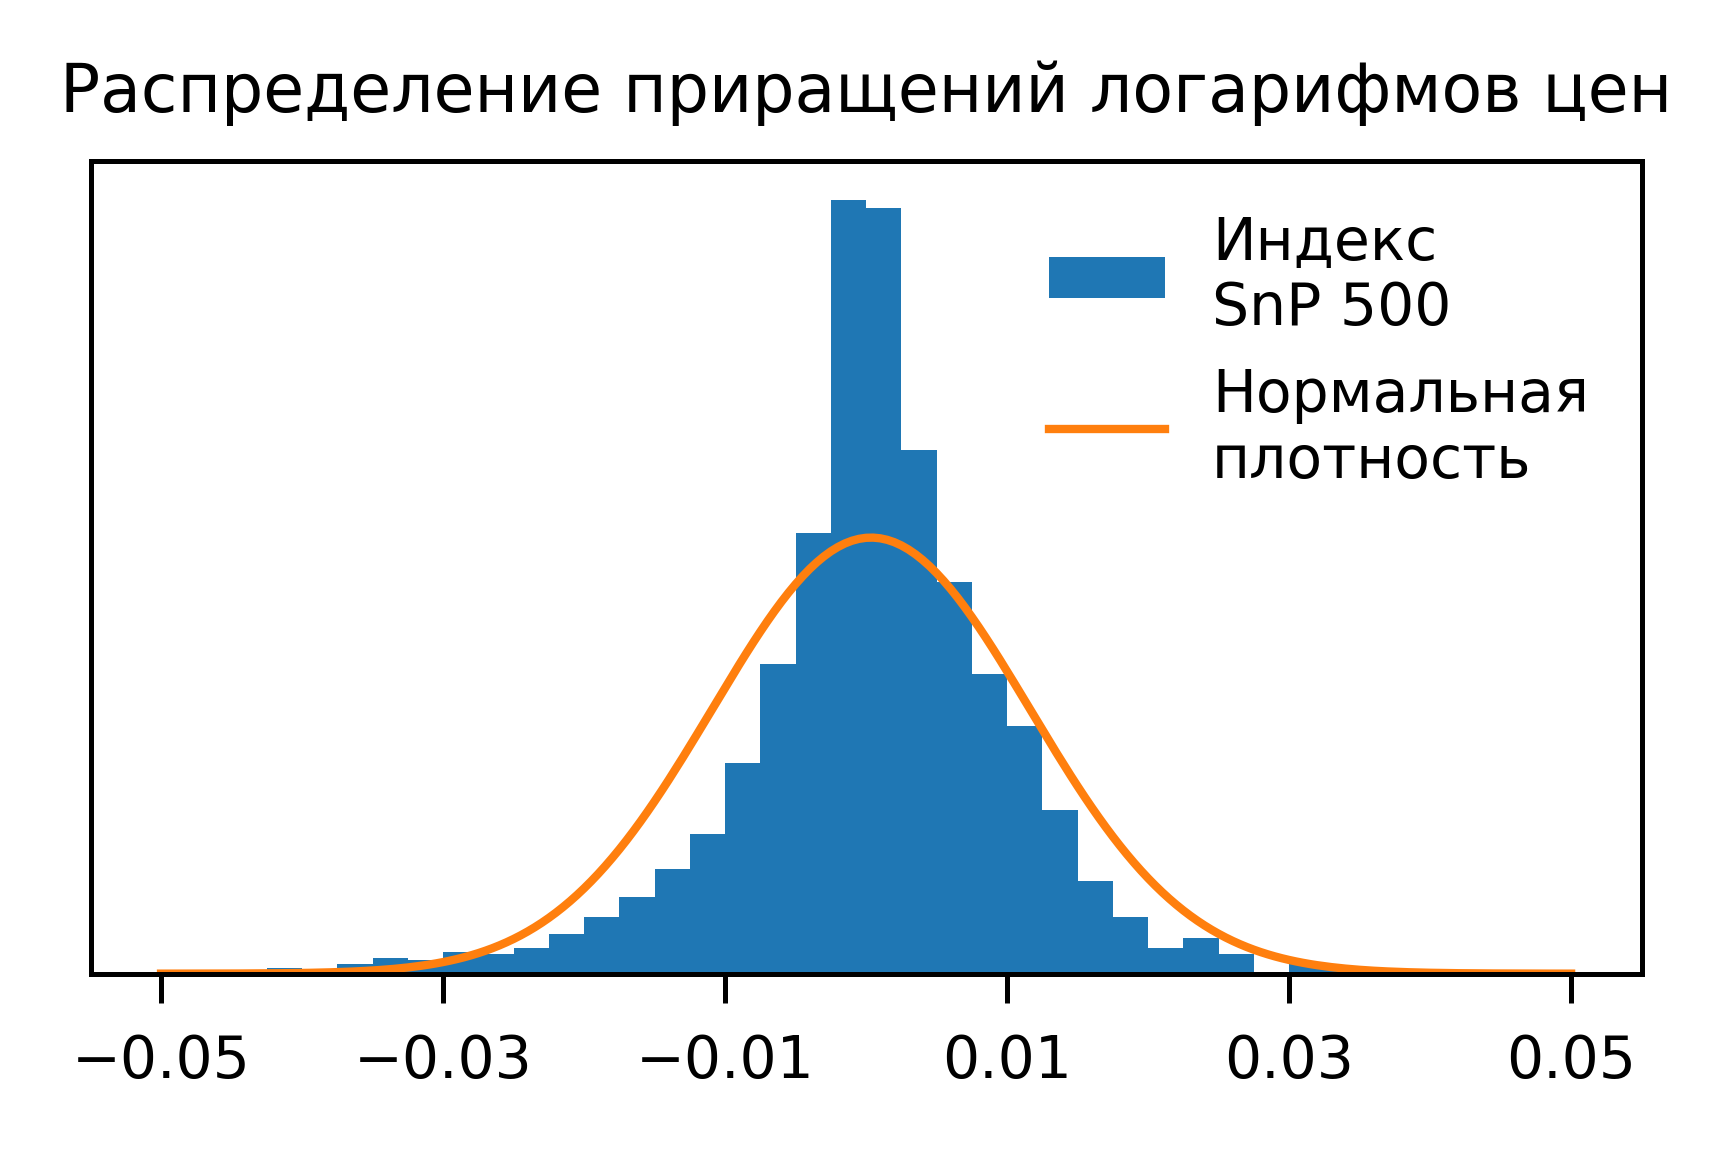

In [4]:
# Гистограмма распределения приращений логарифмов цен

fig, ax = plt.subplots(1, 1, figsize=(2.7, 1.8), constrained_layout=True)
ax.set_title('Распределение приращений логарифмов цен')
ax.set_xlim(-0.055,0.055)
ax.set_xticks(np.arange(-0.05, 0.06, 0.02))
ax.set_yticks([])

# Гистограмма
ax.hist(L, density=True, bins=np.linspace(-0.05, 0.05, 41), label='Индекс\nSnP 500')

# Нормальная плотность
z = np.linspace(-0.05, 0.05, 201)
ax.plot(z, st.norm(mu, sigma).pdf(z), label='Нормальная\nплотность')

ax.legend(frameon=False);

In [5]:
# Коэффициент асимметрии и эксцесса

print(f'Skew: {st.skew(L)} (p-value: {st.skewtest(L)[1]})')
print(f'Kurtosis: {st.kurtosis(L)} (p-value: {st.kurtosistest(L)[1]})')

Skew: -0.8103472433044421 (p-value: 6.6755003756765805e-49)
Kurtosis: 15.717113255670114 (p-value: 5.387768820253485e-125)


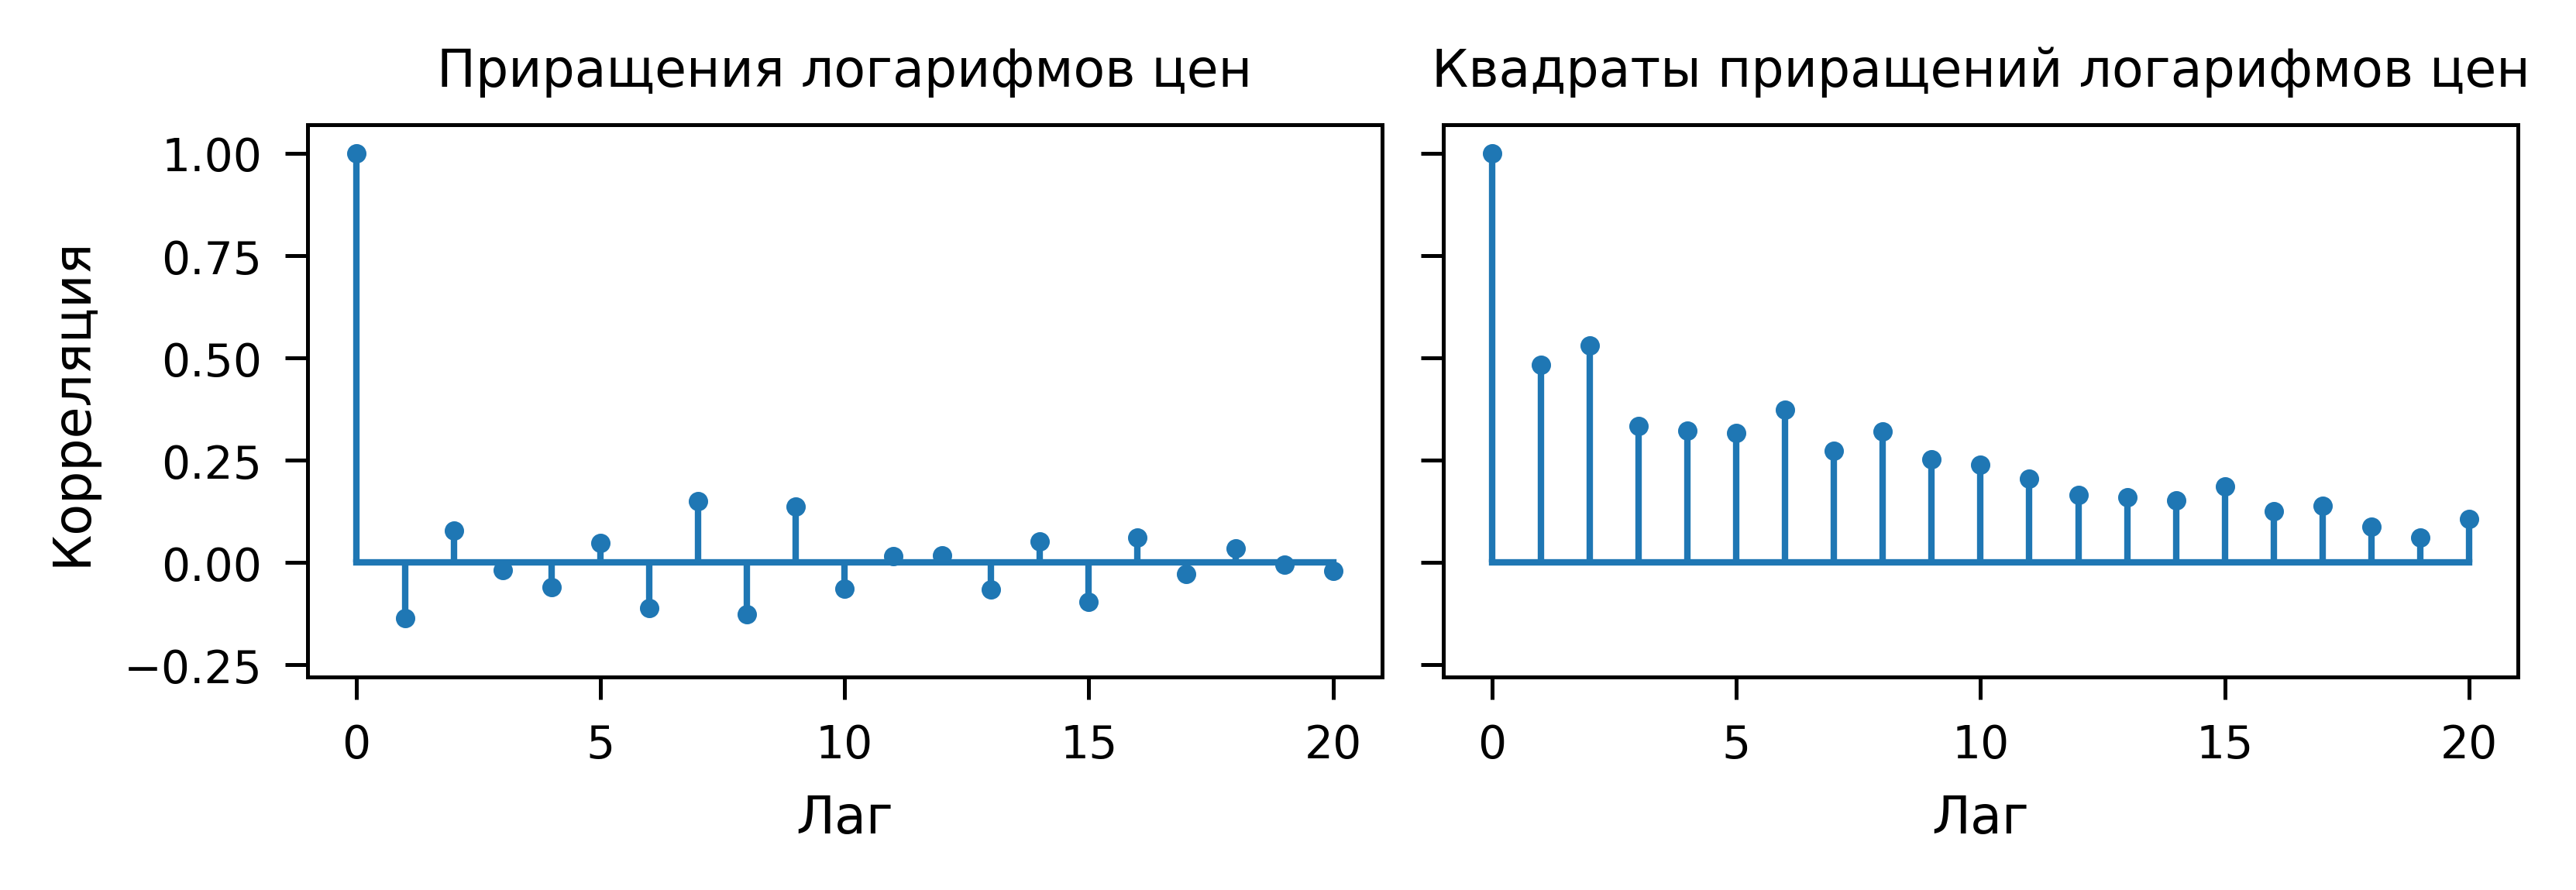

In [6]:
# Автокорреляция приращений и квадратов приращений

# Вычисление автокорреляции для лагов 0, ..., lags
def autocorr(x, lags):
    corr = [1. if l==0 else np.corrcoef(x[l:], x[:-l])[0,1] for l in range(lags+1)]
    return np.array(corr)

lags=20
L_corr = autocorr(L, lags)
L2_corr = autocorr(L**2, lags)

fig, ax = plt.subplots(1, 2, figsize=(5.4, 1.8), constrained_layout=True, sharey=True)

# Автокорреляция L
ax[0].set_title('Приращения логарифмов цен')
ax[0].set_xlabel('Лаг')
ax[0].set_ylabel('Корреляция')
ax[0].set_ylim(-0.28, 1.07)
markerline0, _, bottomline0 = ax[0].stem(np.arange(lags+1), L_corr)
markerline0.set_markersize(2)
bottomline0.set_color('C0')

# Автокорреляция L^2
ax[1].set_title('Квадраты приращений логарифмов цен')
ax[1].set_xlabel('Лаг')
markerline1, _, bottomline1 = ax[1].stem(np.arange(lags+1), L2_corr)
markerline1.set_markersize(2)
bottomline1.set_color('C0');